In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Data of Customers.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

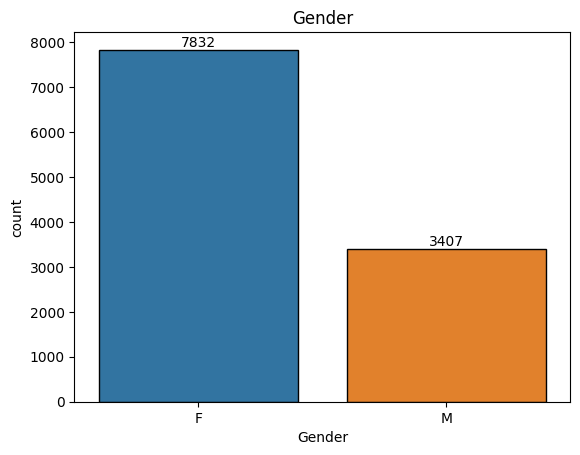

In [17]:
ax = sns.countplot(x = 'Gender',hue ='Gender',data = df,edgecolor = "black")
ax.set_title("Gender")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Gender'}, xlabel='Gender', ylabel='count'>

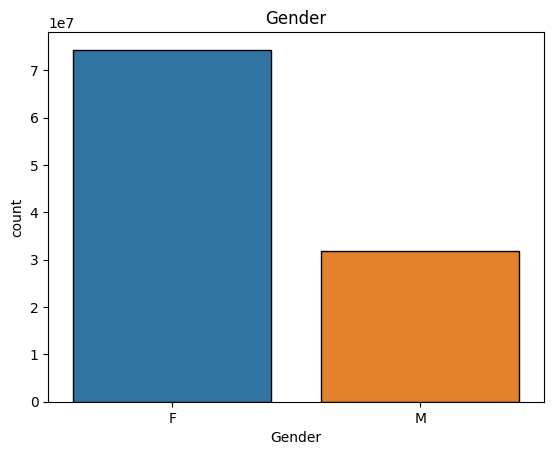

In [18]:
ax = sns.countplot(x = 'Gender',hue ='Gender',data = df)
ax.set_title("Gender")
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,hue ='Gender',data = sales_gen,edgecolor = "black")

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

## Age

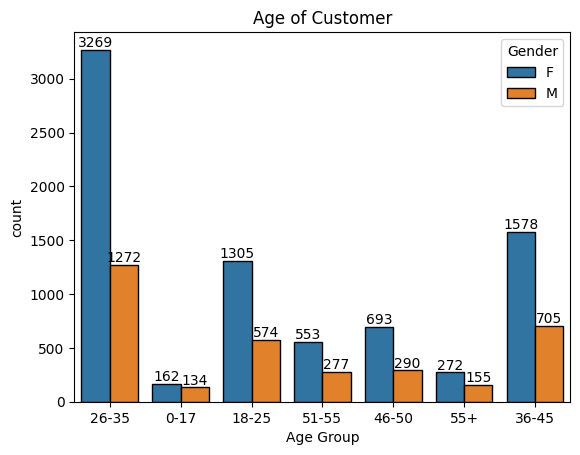

In [19]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',edgecolor = "black")
ax.set_title("Age of Customer")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Age of Customer'}, xlabel='Age Group', ylabel='count'>

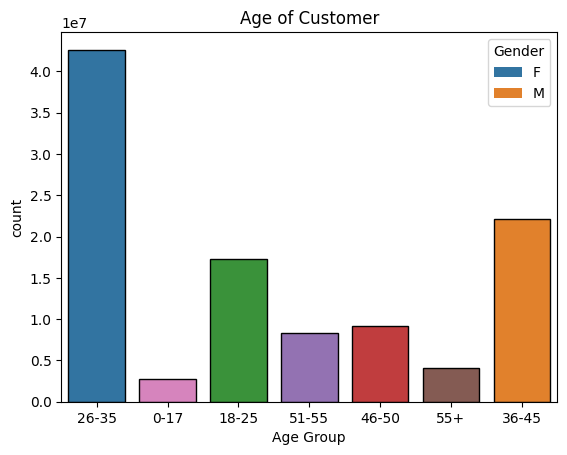

In [20]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
ax.set_title("Age of Customer")
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',hue= 'Age Group',y= 'Amount',data = sales_age,edgecolor = "black")

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

## Marital Status

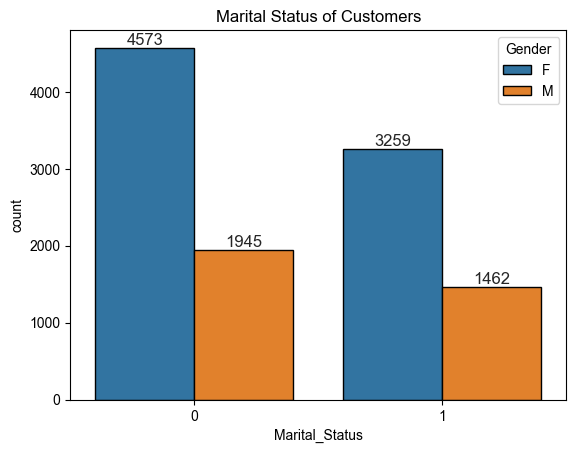

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue='Gender',edgecolor = "black")
ax.set_title("Marital Status of Customers")
sns.set(rc={'figure.figsize':(7,5)}) 
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Marital Status of Customers'}, xlabel='Marital_Status', ylabel='count'>

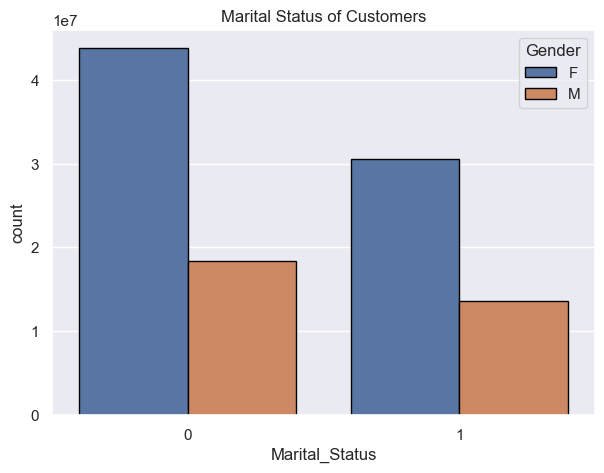

In [22]:
ax = sns.countplot(data = df, x = 'Marital_Status')
ax.set_title("Marital Status of Customers")
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',edgecolor = "black")

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

## State

<Axes: title={'center': 'State wise Customers'}, xlabel='State', ylabel='count'>

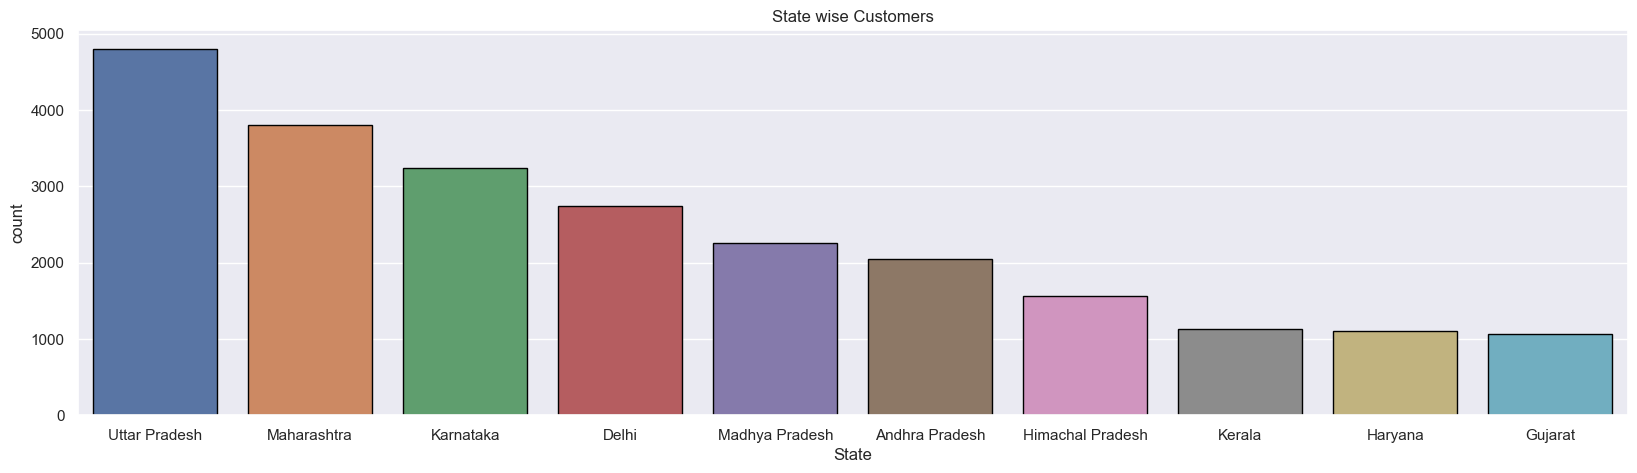

In [25]:
ax = sns.countplot(data = sales_state, x = 'State')
ax.set_title("State wise Customers")
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',hue='State',y= 'Orders',edgecolor = "black")

<Axes: title={'center': 'State wise Customers'}, xlabel='State', ylabel='count'>

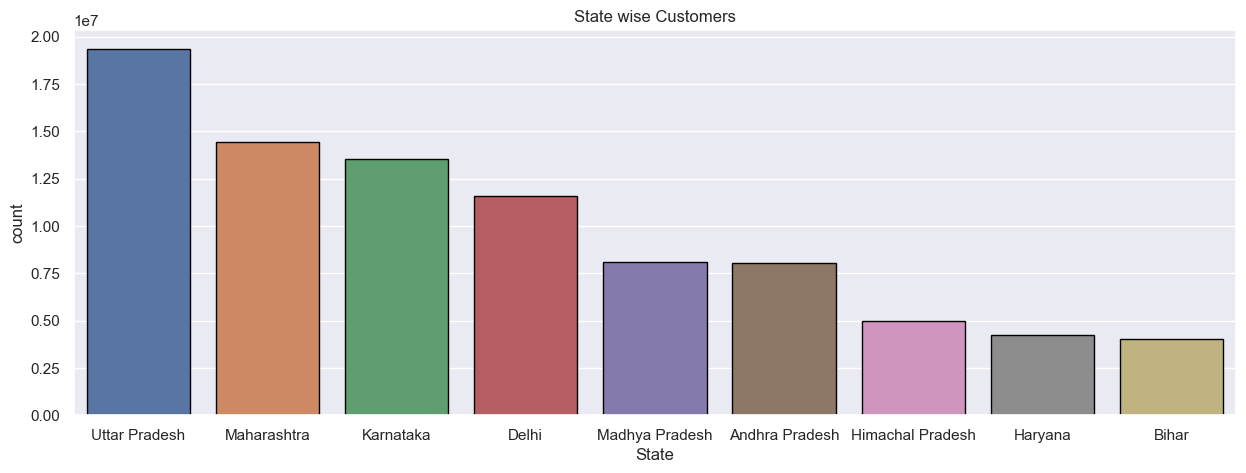

In [28]:
ax = sns.countplot(data = sales_state, x = 'State')
ax.set_title("State wise Customers")
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(9)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State',edgecolor = "black")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Occupation

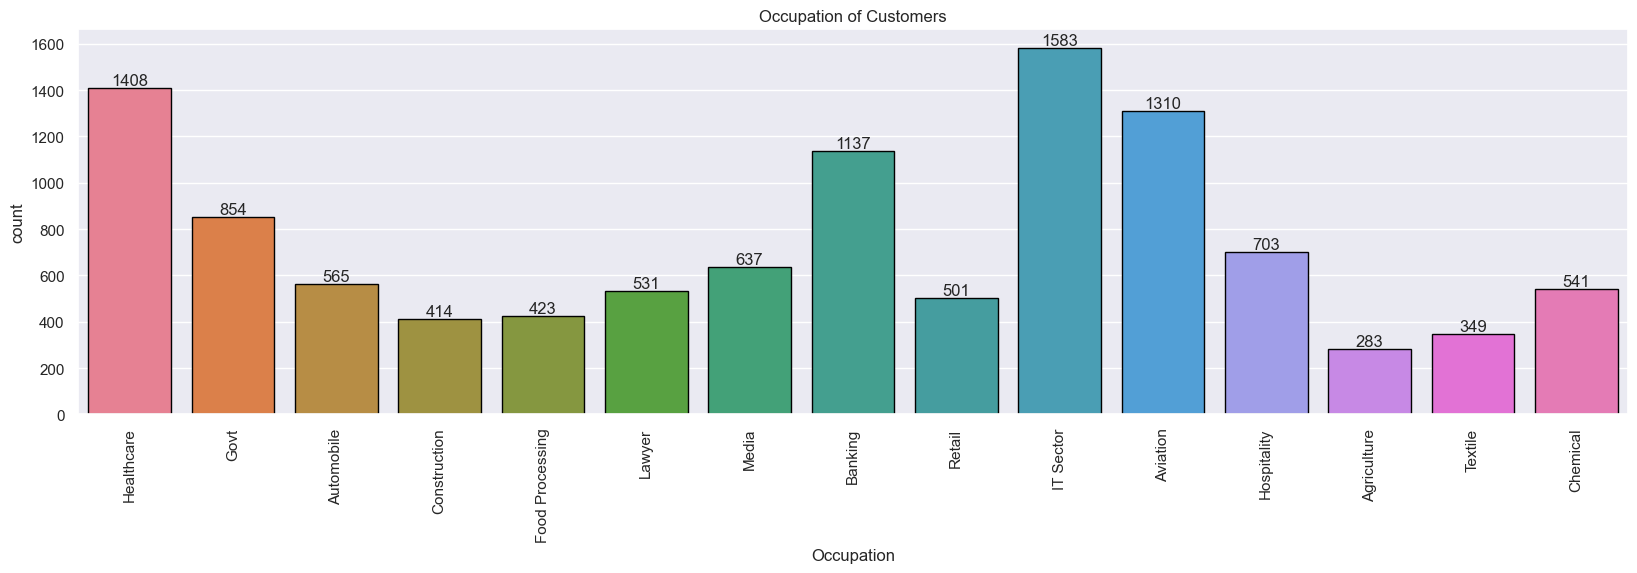

In [30]:
ax = sns.countplot(data = df, x = 'Occupation', hue= 'Occupation',edgecolor = "black")
ax.set_title("Occupation of Customers")
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90) 
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Occupation of Customers'}, xlabel='Occupation', ylabel='count'>

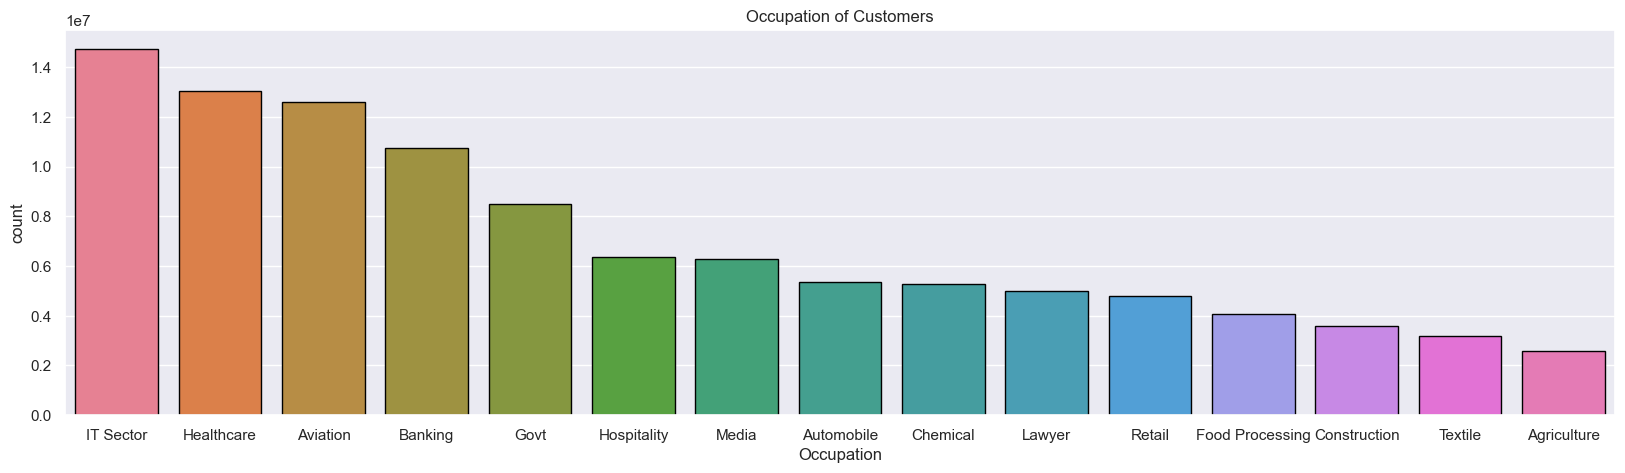

In [34]:
ax = sns.countplot(data = sales_state, x = 'Occupation')
ax.set_title("Occupation of Customers")
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',edgecolor = "black",hue= 'Occupation')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

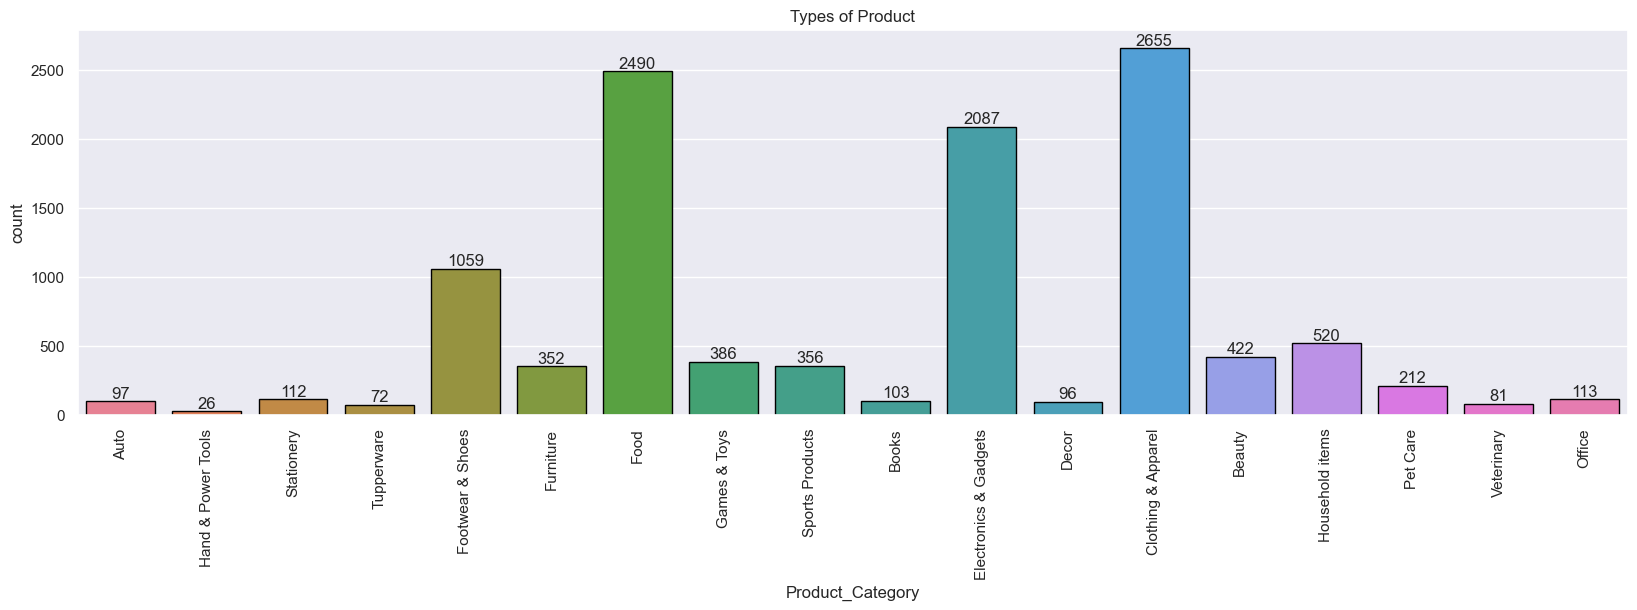

In [41]:
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category',edgecolor = "black")
ax.set_title("Types of Product")
sns.set(rc={'figure.figsize':(23,5)})
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Types of Product'}, xlabel='Product_Category', ylabel='count'>

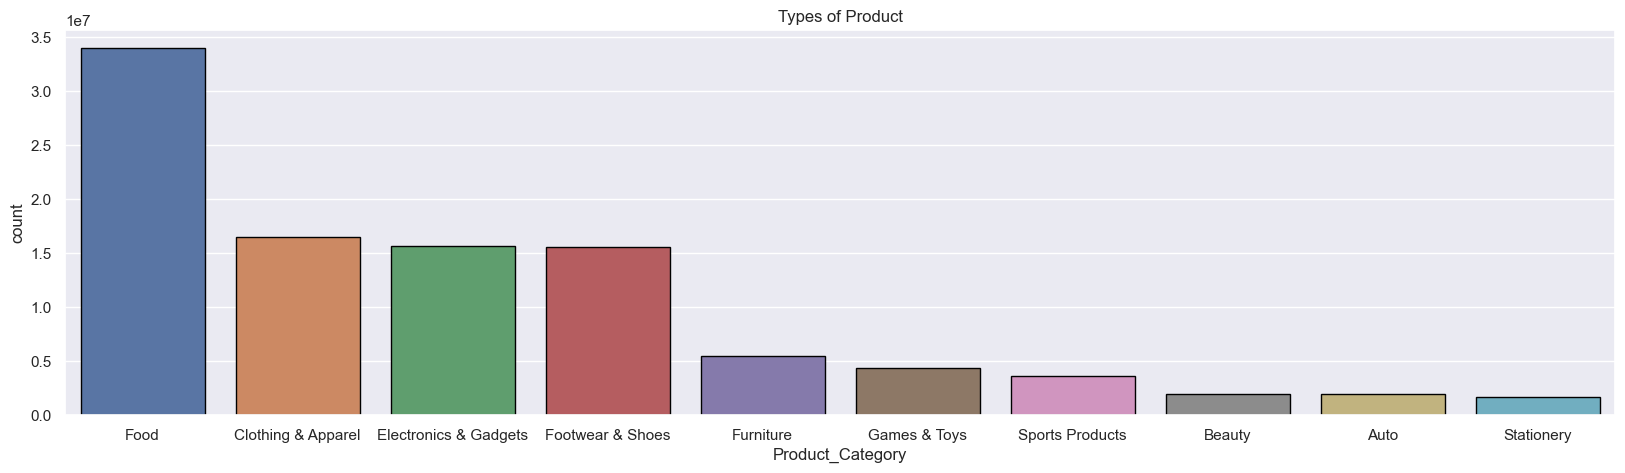

In [37]:
ax = sns.countplot(data = sales_state, x = 'Product_Category')
ax.set_title("Types of Product")
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category',edgecolor = "black")

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: title={'center': 'Product_ID of Products'}, xlabel='Product_ID', ylabel='count'>

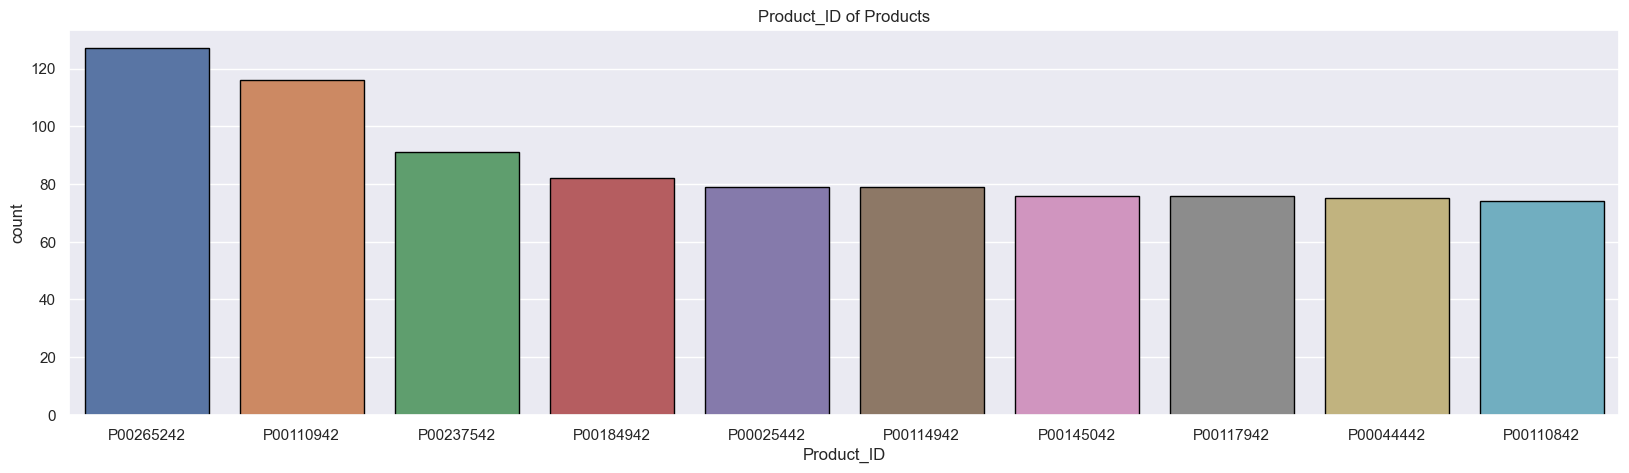

In [39]:
ax = sns.countplot(data = sales_state, x = 'Product_ID',hue='Product_ID')
ax.set_title("Product_ID of Products")
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID',edgecolor = "black")

<Axes: xlabel='Product_ID'>

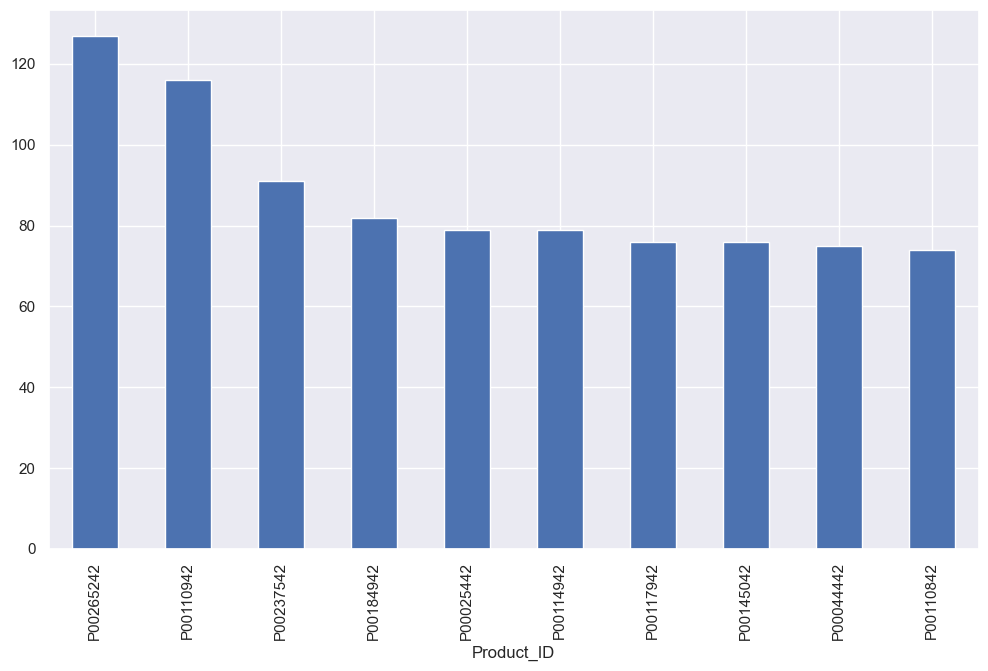

In [40]:
ax.set_title("Product_ID of Products")
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*